# Test k-ary Fat Tree & Shortest Path Hop Distance

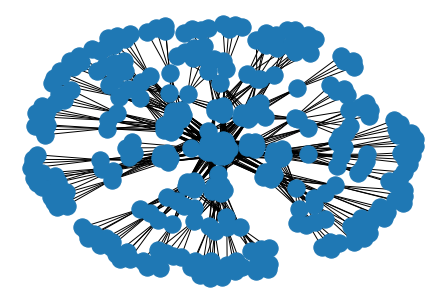

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import hfl_struct

NUM_NODES = 200
NUM_EDGES = 10

ft = hfl_struct.FatTree(NUM_NODES, NUM_EDGES)
nx.draw(ft.g)
plt.show()

#ft.simulate([ [ i, 0 ] for i in range(2) ])
#ft.simulate([ [ i, 0 ] for i in range(16) ])

# Test Cloud Struct

In [3]:
import tensorflow as tf
import hfl_param
import hfl_struct
import hfl_util

NUM_NODES = 100
NUM_EDGES = 10

trainData, testData = tf.keras.datasets.mnist.load_data()
(trainData_byNid, train_z) = hfl_util.groupByEdge(hfl_param.MODEL_NAME, hfl_param.DATA_NAME, trainData, 'one', 'half', NUM_NODES, NUM_EDGES)

ft = hfl_struct.FatTree(NUM_NODES, NUM_EDGES)
c = hfl_struct.Cloud(ft, trainData_byNid, NUM_EDGES)
c.digest(train_z)

print(c.get_D(), len(c.get_N()), len(c.get_nid2_D_i()))
print(c.get_d_group(True), c.get_d_global(True))
print(c.get_d_group(False), c.get_d_global(False))

60000 100 100
Simulation Finished(d_group) : 0.049 s
Simulation Finished(d_global) : 0.197 s
0.04881601 0.19656243
Simulation Finished(d_group) : 0.055 s
Simulation Finished(d_global) : 0.381 s
0.05530010999999999 0.380703805


# Digest Test

In [3]:
import tensorflow as tf
import hfl_param
import hfl_struct
import hfl_util

NUM_NODES = 100
NUM_EDGES = 10

trainData, testData = tf.keras.datasets.mnist.load_data()
(trainData_byNid, train_z) = hfl_util.groupByEdge(hfl_param.MODEL_NAME, hfl_param.DATA_NAME, trainData, 'one', 'all', NUM_NODES, NUM_EDGES)

ft = hfl_struct.FatTree(NUM_NODES, NUM_EDGES)
c = hfl_struct.Cloud(ft, trainData_byNid, NUM_EDGES)
c.digest(train_z)
d_group = c.get_d_group(False)
d_global = c.get_d_global(False)
print(d_group, d_global, d_group/d_global)

# Node Membership 하나 변경
train_z[0] = 9 # Group.digest() 에 k 를 로그 찍으며 0 과 9 번 그룹만 나옴
c.digest(train_z)
d_group = c.get_d_group(False)
d_global = c.get_d_global(False)
print(d_group, d_global, d_group/d_global)

Simulation Finished(d_group) : 0.055 s
Simulation Finished(d_global) : 0.381 s
0.05530010999999999 0.380703805 0.14525757104003725
Simulation Finished(d_group) : 0.068 s
Simulation Finished(d_global) : 0.381 s
0.06787738 0.380703805 0.1782944617535409
